
<a href="https://www.zero-grad.com/">
         <img alt="Zero Grad" src="https://i.postimg.cc/7hJWBrFs/pythondataanalysis.png" >
      </a>

# Data Description

You can get data from Kaggle : https://www.kaggle.com/competitions/titanic/data

* Data Dictionary

| Feature | Definition | Key |
|:---|:---|:---|
| PassengerId | Unique ID of the passenger |  |
| Survived | Survival | 0 = No, 1 = Yes |
| Pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| Name | Name of the passenger |  |
| Sex | Sex |  |
| Age | Age in years |  |
| SibSp | # of siblings / spouses aboard the Titanic |  |
| Parch | # of parents / children aboard the Titanic |  |
| Ticket | Ticket number |  |
| Fare | Passenger fare |  |
| Cabin | Cabin number |  |
| Embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |


* Data Dictionary

    * `pclass`: A proxy for socio-economic status (SES)
        - 1st = Upper
        - 2nd = Middle
        - 3rd = Lower

    * `age`: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

    * `sibsp`: The dataset defines family relations in this way...
        + Sibling = brother, sister, stepbrother, stepsister
        + Spouse = husband, wife (mistresses and fiancés were ignored)

    * `parch`: The dataset defines family relations in this way...
        + Parent = mother, father
        + Child = daughter, son, stepdaughter, stepson
        + Some children travelled only with a nanny, therefore parch=0 for them.




# Importing Libraries

In [ ]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
# sys.modules

In [ ]:
'google.colab' in sys.modules

False

# Exploring the Data

In [ ]:
# Check if running in Google Colab
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')
    csv_path = '/content/drive/MyDrive/Grokking Machine Learning/02- Python Data Analysis/01- Titanic Data Analysis Project/titanic_train.csv'
else:
    csv_path = 'titanic_train.csv'

In [ ]:
df = pd.read_csv(csv_path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* Unuseful Features : `PassengerId, Name and Ticket` >> To be dropped
* Categorical Features: `Sex, Pclass, SibSp, Parch and Embarked `
* Numerical Features : `Age and Fare`
* Target : `Survived`

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Duplicate Values

In [ ]:
# Check duplicates
df.duplicated().sum()

0

>If there are any duplicates, we will drop them:

         df.drop_duplicates(inplace=True)

# Missing Values

In [ ]:
# Check Missing Values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
round(df.isna().mean() * 100 ,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

* Missing Values can be dropped or imputed.
* If Missing Values are less than 5% of the total data, we can drop ***Rows***.
* If Missing Values are more than 40% of the total data, we can drop ***Column***.
* Otherwise, we can impute them
        
        ( Not a rule of thumb, but a good practice)

In [ ]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
df.dropna(subset=['Embarked'], inplace=True)

In [ ]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
round(df.isna().mean() * 100 ,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.91
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.28
Embarked        0.00
dtype: float64

<Axes: >

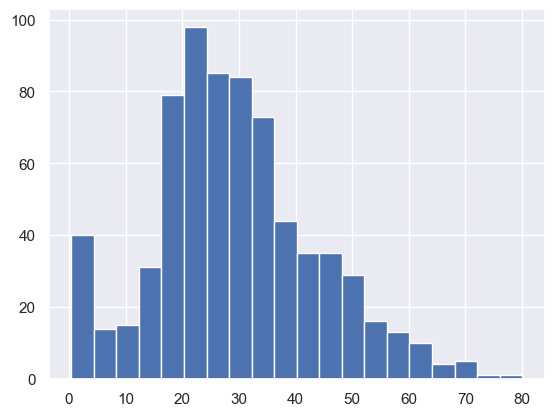

In [ ]:
df.Age.hist(bins=20)

In [ ]:
#df.Age.fillna(df.Age.median(), inplace=True)  # Not the optimal way to fill missing values

* We can try to impute the missing values according to a relation between the missing feature and other features.
* For example, we can impute the missing values of `Age` according to the `Pclass` and `Sex` of the passenger.
* We can also use KNN imputation to impute the missing values.

In [ ]:
df[df['Sex'] == 'female'].Age.median()

27.0

In [ ]:
df[df['Sex'] == 'male'].Age.median()

29.0

In [ ]:
print(df[df['Pclass'] == 1].Age.median())
print(df[df['Pclass'] == 2].Age.median())
print(df[df['Pclass'] == 3].Age.median())

37.0
29.0
24.0


In [ ]:
print(df[(df['Pclass'] == 1) & (df['Sex'] == 'female')].Age.median())
print(df[(df['Pclass'] == 1) & (df['Sex'] == 'male')].Age.median())
print(df[(df['Pclass'] == 2) & (df['Sex'] == 'female')].Age.median())
print(df[(df['Pclass'] == 2) & (df['Sex'] == 'male')].Age.median())
print(df[(df['Pclass'] == 3) & (df['Sex'] == 'female')].Age.median())
print(df[(df['Pclass'] == 3) & (df['Sex'] == 'male')].Age.median())

35.0
40.0
28.0
30.0
21.5
25.0


In [ ]:
df.groupby(['Pclass', 'Sex'])['Age'].median()

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

In [ ]:
c1_f_age = 35
c1_m_age = 40
c2_f_age = 28
c2_m_age = 30
c3_f_age = 21
c3_m_age = 25

def impute_age(x):
    if pd.isnull(x['Age']):
        if x['Pclass'] == 1 and x['Sex'] == 'female':
             return c1_f_age
        elif x['Pclass'] == 1 and x['Sex'] == 'male':
             return c1_m_age
        elif x['Pclass'] == 2 and x['Sex'] == 'female':
             return c2_f_age
        elif x['Pclass'] == 2 and x['Sex'] == 'male':
             return c2_m_age
        elif x['Pclass'] == 3 and x['Sex'] == 'female':
             return c3_f_age
        else:
             return c3_m_age
    else:

        return x['Age']

#df['Age'] = df.apply(lambda row : impute_age(row), axis=1)

In [ ]:
import pandas as pd
pd.__version__

'1.4.2'

In [ ]:
# filling missing values of age based on Pclass and Sex
df['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].apply(lambda x: x.fillna(x.median()))

* Using KNN Imputation

    ```
    from sklearn.impute import KNNImputer
    imputer = KNNImputer(n_neighbors=2)
    df[['Age']] = imputer.fit_transform(df[['Age']])
    ```
    
> Example : https://medium.com/@kyawsawhtoon/a-guide-to-knn-imputation-95e2dc496e

        Note: In case of building a model, we split the data into train and test sets.
        we calculate the mean/median of the train set and impute the missing values in the test set with the mean/median of the train set.

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

# Drop Columns

In [ ]:
# Drop Unnecessary columns
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Rename Columns

In [ ]:
# Rename Columns
#df.rename(columns={'Survived': 'survived', 'Pclass': 'pclass', 'SibSp': 'brothers', 'Parch': 'parch'}, inplace=True)
df.columns = df.columns.str.lower()

In [ ]:
df.sample()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
66,1,2,female,29.0,0,0,10.5,S


# Univariate Analysis

In [ ]:
df.survived.value_counts()

0    549
1    340
Name: survived, dtype: int64

In [ ]:
df.survived.value_counts() / len(df)   # shape[0]

0    0.617548
1    0.382452
Name: survived, dtype: float64

In [ ]:
df.survived.value_counts(normalize=True)

0    0.617548
1    0.382452
Name: survived, dtype: float64

        Suvival Rate : 38.38%

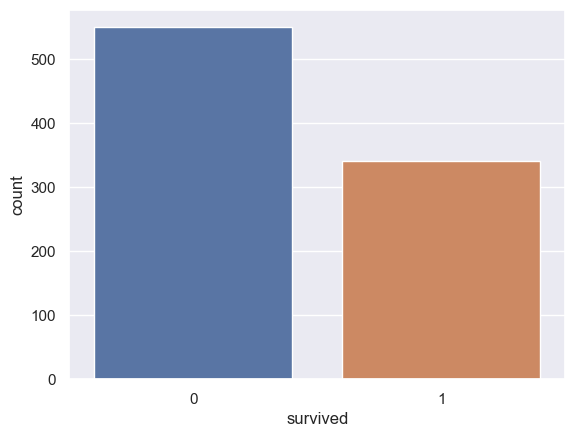

In [ ]:
sns.countplot(x='survived', data=df);

In [ ]:
df.pclass.value_counts(normalize=True)

3    0.552306
1    0.240720
2    0.206974
Name: pclass, dtype: float64

        More than 55% of the passengers were from 3rd class

In [ ]:
df.sibsp.value_counts(normalize=True)

0    0.681665
1    0.235096
2    0.031496
4    0.020247
3    0.017998
8    0.007874
5    0.005624
Name: sibsp, dtype: float64

        More than 68% of the passengers had no siblings or spouse

In [ ]:
col='Age'
col2 = 'Sex'
print(f'### {col}, {col2} ###')
print('###', col, '###')
print('### {} , {} ###'.format(col, col2))


### Age, Sex ###
### Age ###
### Age , Sex ###


In [ ]:
def explore_categorical(df, col):
    print(f'### {col} ###')
    print(df[col].value_counts(normalize=True))
    sns.countplot(x=col, data=df);
    plt.show()

### pclass ###
3    0.552306
1    0.240720
2    0.206974
Name: pclass, dtype: float64


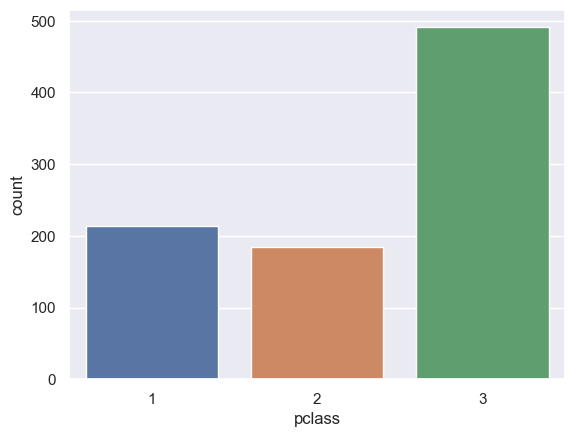

### sibsp ###
0    0.681665
1    0.235096
2    0.031496
4    0.020247
3    0.017998
8    0.007874
5    0.005624
Name: sibsp, dtype: float64


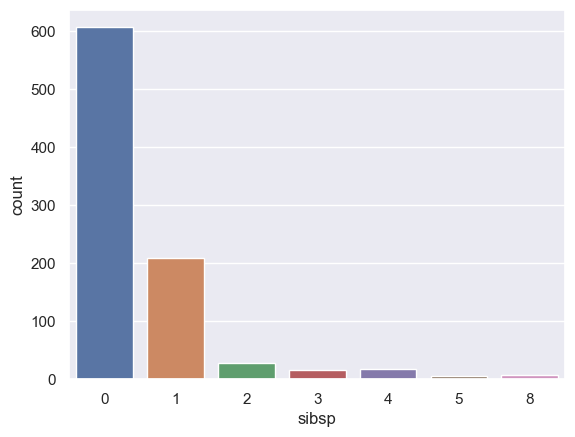

### parch ###
0    0.760405
1    0.132733
2    0.089989
5    0.005624
3    0.005624
4    0.004499
6    0.001125
Name: parch, dtype: float64


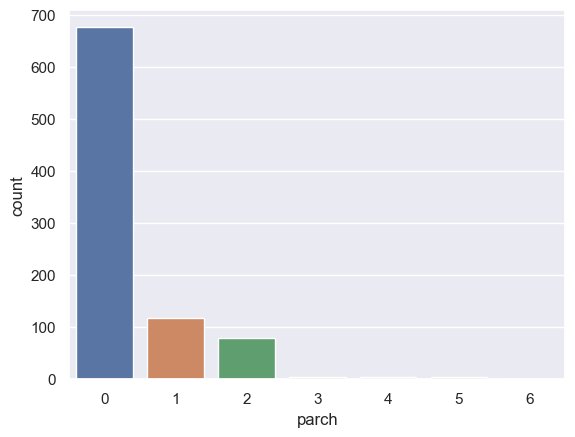

### embarked ###
S    0.724409
C    0.188976
Q    0.086614
Name: embarked, dtype: float64


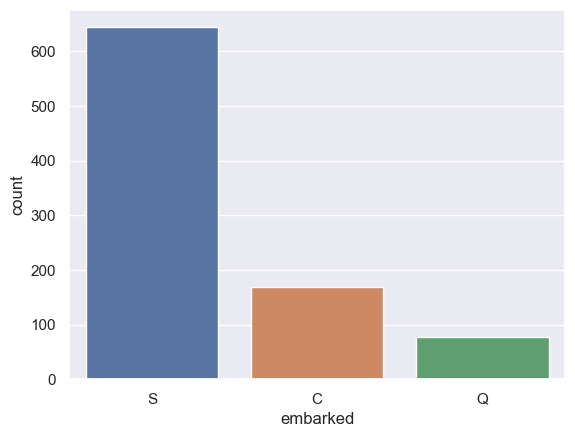

### sex ###
male      0.649044
female    0.350956
Name: sex, dtype: float64


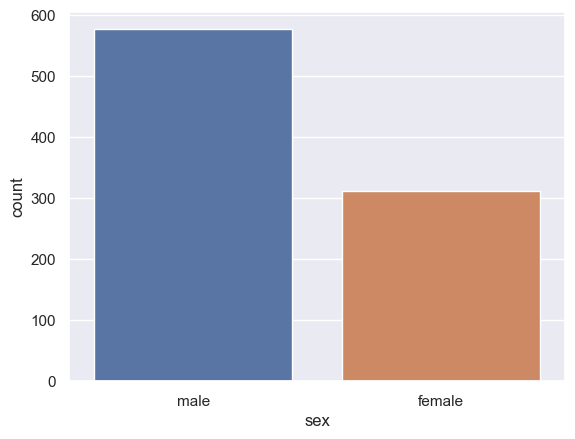

In [ ]:
for col in ['pclass', 'sibsp', 'parch', 'embarked', 'sex']:
    explore_categorical(df, col)

In [ ]:
def explore_continuous(df, col):
    print(f'### {col} ###')
    print(df[col].describe())
    sns.histplot(x=col, data=df);
    plt.show()

### age ###
count    889.000000
mean      29.065433
std       13.270162
min        0.420000
25%       21.500000
50%       26.000000
75%       36.000000
max       80.000000
Name: age, dtype: float64


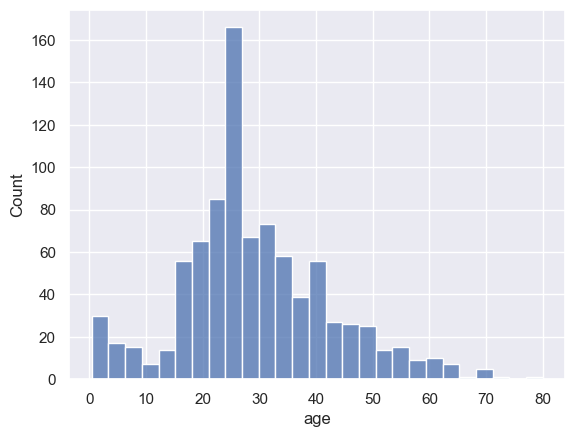

### fare ###
count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64


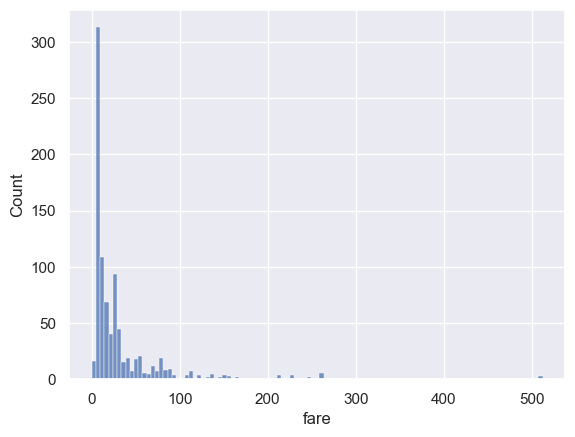

In [ ]:
for col in ['age', 'fare']:
    explore_continuous(df, col)


# Bivariate Analysis

In [ ]:
df.sample()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
141,1,3,female,22.0,0,0,7.75,S


In [ ]:
df.groupby('pclass').survived.mean()

pclass
1    0.626168
2    0.472826
3    0.242363
Name: survived, dtype: float64

        The higher the class, the higher the survival rate

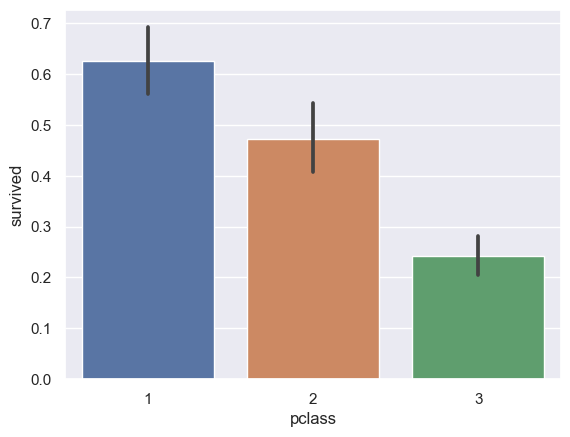

In [ ]:
# plot class vs survived
sns.barplot(x='pclass', y='survived', data=df);

C:\Users\ahmad\AppData\Local\Temp\ipykernel_17796\3650877100.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='pclass', y='survived', data=df, ci=None);


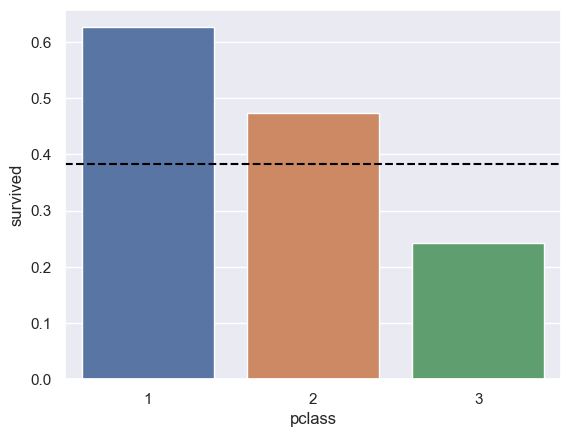

In [ ]:
sns.barplot(x='pclass', y='survived', data=df, ci=None);
# plot horizontal line for mean
plt.axhline(df.survived.mean(), color='black', linestyle='--');
plt.show()

In [ ]:
# Survival rate for each group
def survival_rate(df, col):
    print(df.groupby(col).survived.mean())
    sns.barplot(x=col, y='survived', data=df, ci=None);
    #plot horizontal line for overall survival rate
    plt.axhline(df.survived.mean(), color='black', linestyle='--')
    plt.show()


C:\Users\ahmad\AppData\Local\Temp\ipykernel_17796\2779290449.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='survived', data=df, ci=None);


pclass
1    0.626168
2    0.472826
3    0.242363
Name: survived, dtype: float64


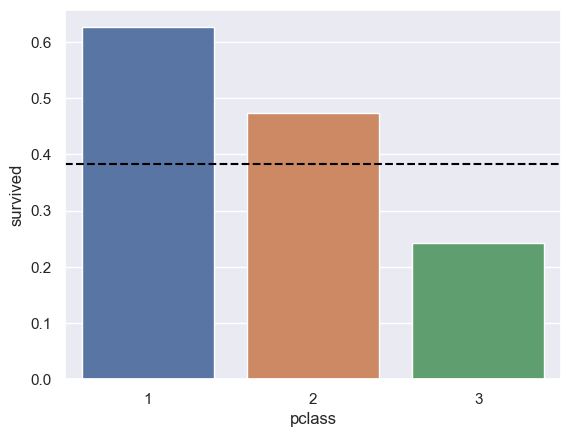

sibsp
0    0.343234
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: survived, dtype: float64


C:\Users\ahmad\AppData\Local\Temp\ipykernel_17796\2779290449.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='survived', data=df, ci=None);


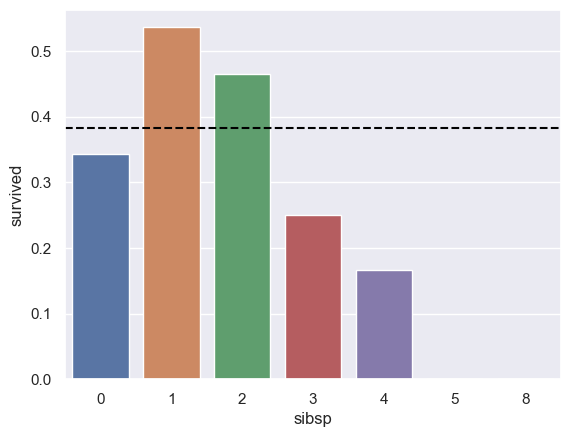

C:\Users\ahmad\AppData\Local\Temp\ipykernel_17796\2779290449.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='survived', data=df, ci=None);


parch
0    0.341716
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: survived, dtype: float64


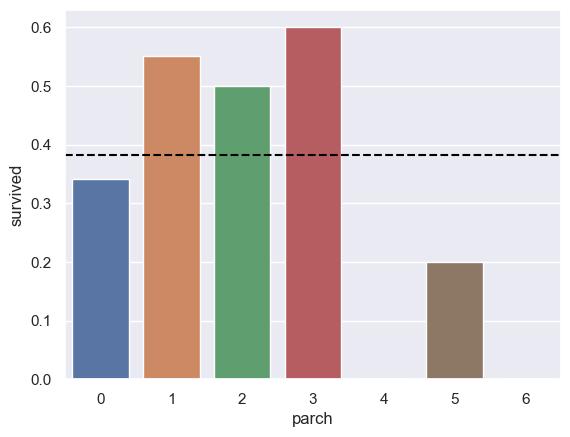

C:\Users\ahmad\AppData\Local\Temp\ipykernel_17796\2779290449.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='survived', data=df, ci=None);


embarked
C    0.553571
Q    0.389610
S    0.336957
Name: survived, dtype: float64


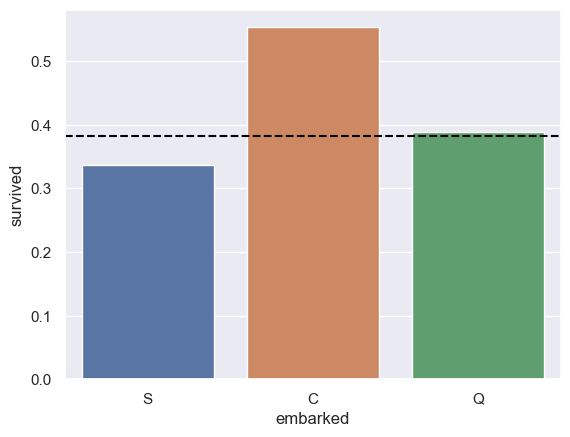

sex
female    0.740385
male      0.188908
Name: survived, dtype: float64


C:\Users\ahmad\AppData\Local\Temp\ipykernel_17796\2779290449.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='survived', data=df, ci=None);


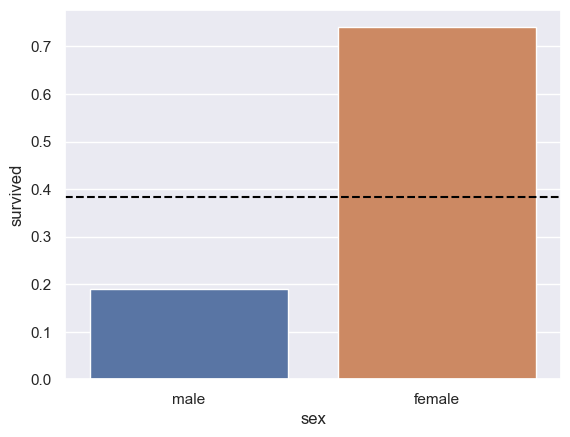

In [ ]:
for col in ['pclass', 'sibsp', 'parch', 'embarked', 'sex']:
    survival_rate(df, col)

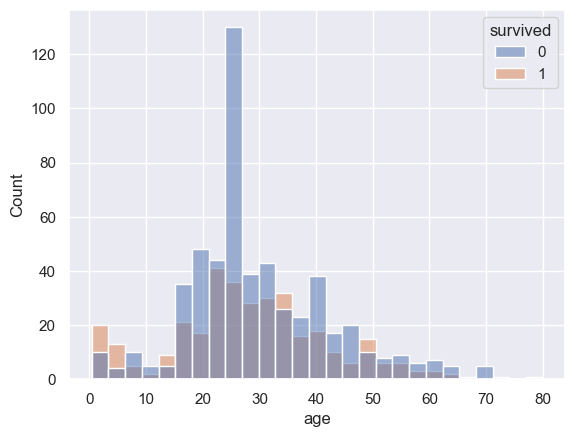

In [ ]:
sns.histplot(x='age', data=df, hue='survived');

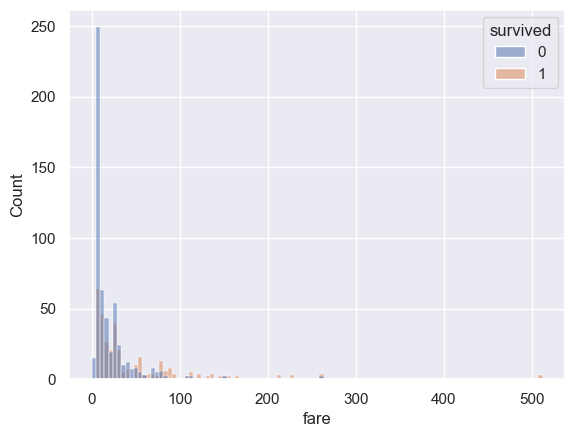

In [ ]:
sns.histplot(x='fare', data=df, hue='survived');

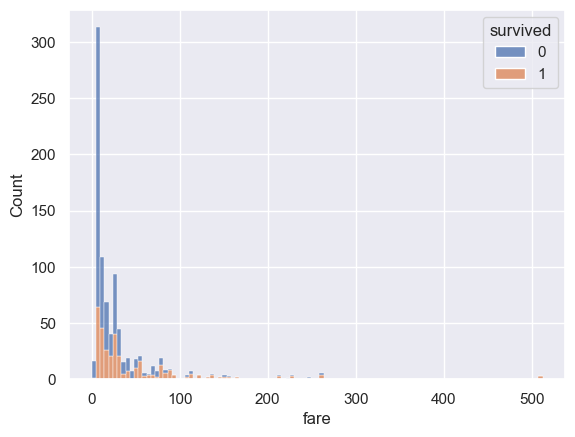

In [ ]:
sns.histplot(x='fare', data=df, hue='survived', multiple='stack');

In [ ]:
df_survived = df[df.survived == 1]
df_died = df[df.survived == 0]

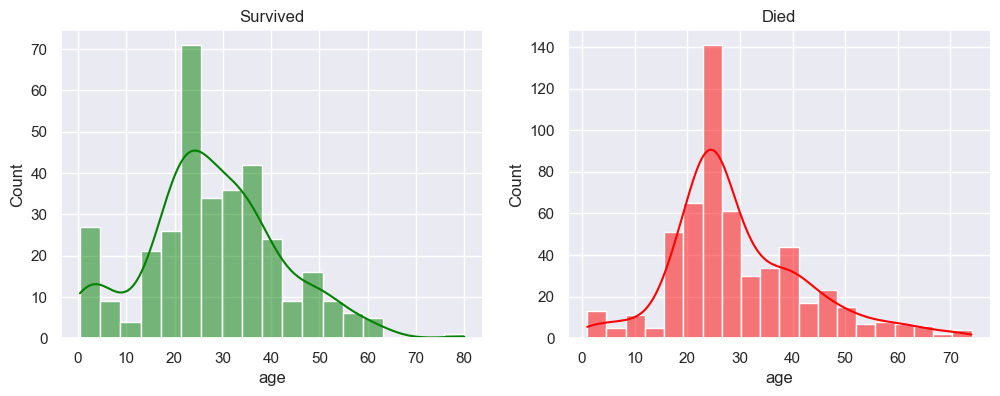

In [ ]:
# Subplots for age distribution
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(x='age', data=df_survived, ax=ax[0], kde=True, color='green')
sns.histplot(x='age', data=df_died, ax=ax[1], kde=True, color='red')
ax[0].set_title('Survived')
ax[1].set_title('Died')
plt.show()

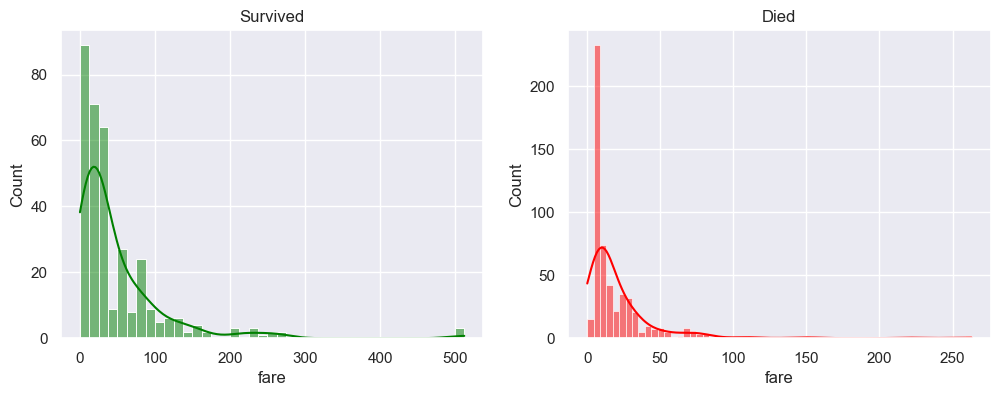

In [ ]:
# Subplots for fare distribution
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(x='fare', data=df_survived, ax=ax[0], kde=True, color='green')
sns.histplot(x='fare', data=df_died, ax=ax[1], kde=True, color='red')
ax[0].set_title('Survived')
ax[1].set_title('Died')
plt.show()

In [ ]:
df.describe()[['age', 'fare']]

,age,fare
count,889.000000,889.000000
mean,29.065433,32.096681
std,13.270162,49.697504
min,0.420000,0.000000
25%,21.500000,7.895800
50%,26.000000,14.454200
75%,36.000000,31.000000
max,80.000000,512.329200


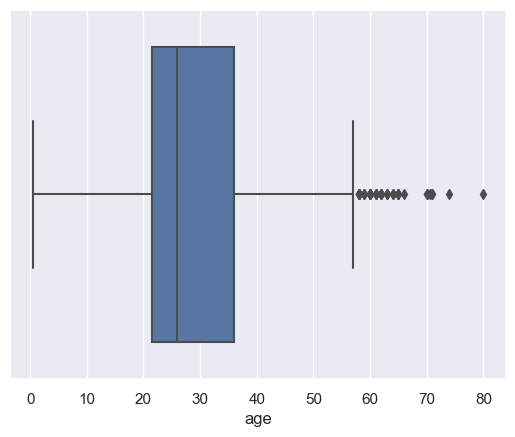

In [ ]:
sns.boxplot( x='age', data=df);

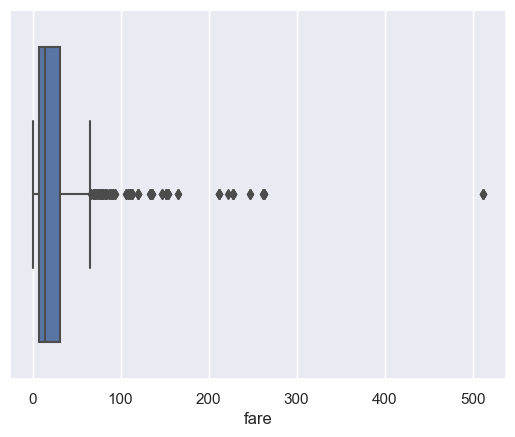

In [ ]:
sns.boxplot( x='fare', data=df);

            Many outliers in the fare
* We can use the IQR method to remove them.
* We can also choose a limit according to the distribution of the data.


# Outliers Detection

In [ ]:
# Remove outliers
def remove_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return df[(df[col] > lower_bound) & (df[col] < upper_bound)]

In [ ]:
df = df[df.fare < 300]
# df = remove_outliers(df, 'fare')

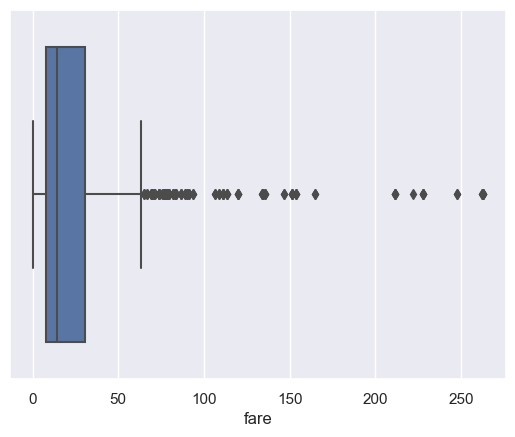

In [ ]:
sns.boxplot( x='fare', data=df);

In [ ]:
df.fare.describe()

count    886.000000
mean      30.470611
std       41.155721
min        0.000000
25%        7.895800
50%       14.454200
75%       30.646850
max      263.000000
Name: fare, dtype: float64

In [ ]:
# Split Age into groups
df['age_group'] = pd.cut(df.age, bins=[0, 22, 27, 37, 82], labels=['child', 'young', 'adult', 'senior'])

# Split Fare into groups
df['fare_group'] = pd.cut(df.fare, bins=[-0.99, 8, 15, 35, 265], labels=['low', 'medium', 'high', 'very high'])

age_group
child     0.450549
young     0.260000
adult     0.427184
senior    0.357488
Name: survived, dtype: float64


C:\Users\ahmad\AppData\Local\Temp\ipykernel_17796\2779290449.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='survived', data=df, ci=None);


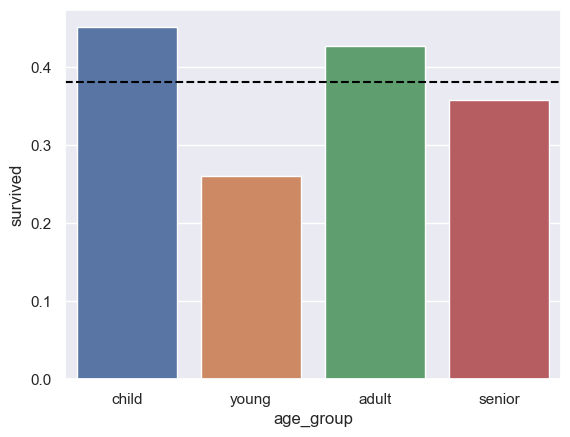

fare_group
low          0.215768
medium       0.285714
high         0.446809
very high    0.611399
Name: survived, dtype: float64


C:\Users\ahmad\AppData\Local\Temp\ipykernel_17796\2779290449.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='survived', data=df, ci=None);


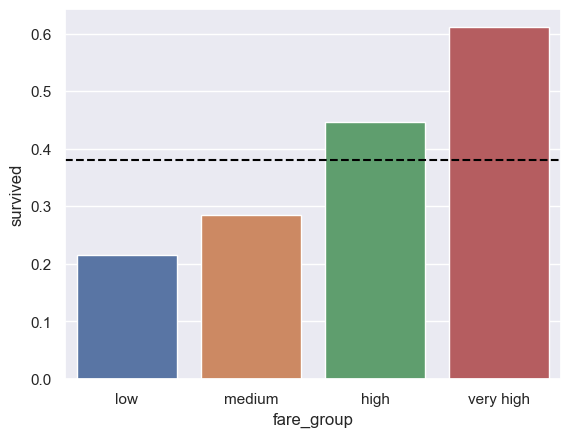

In [ ]:
for col in ['age_group', 'fare_group']:
    survival_rate(df, col)

# Multivariate Analysis

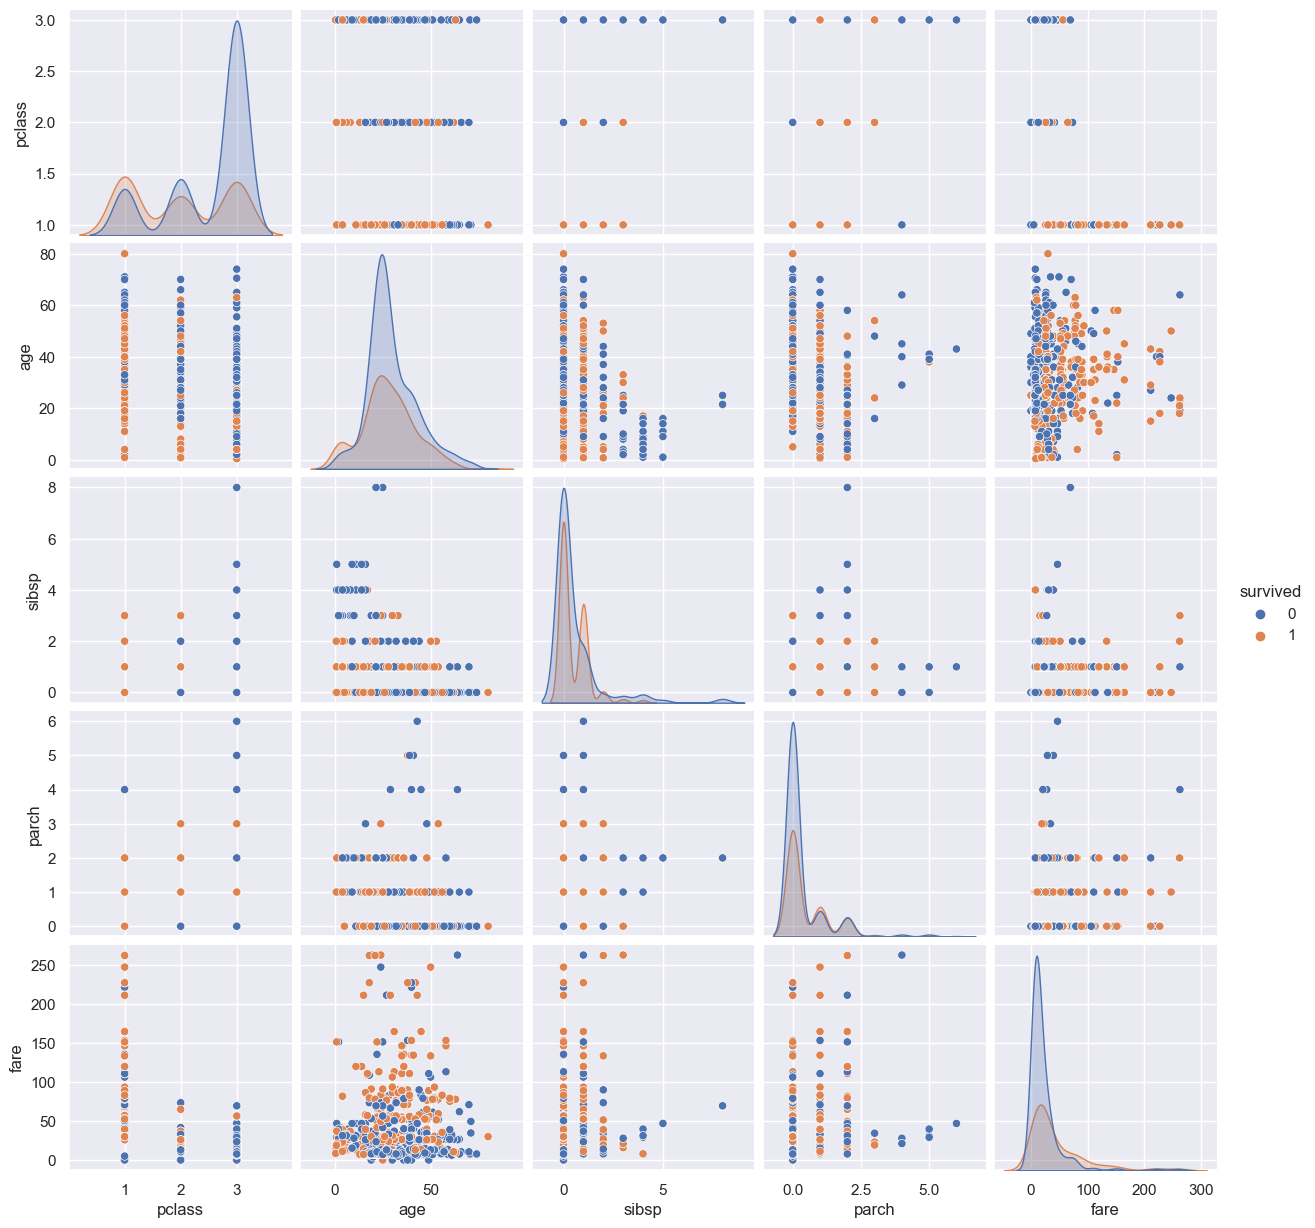

In [ ]:
sns.pairplot(df, hue='survived');

In [ ]:
df.corr()

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.331075,-0.066652,-0.032095,0.083691,0.259188
pclass,-0.331075,1.000000,-0.410056,0.079490,0.016579,-0.603362
age,-0.066652,-0.410056,1.000000,-0.248590,-0.174682,0.126314
sibsp,-0.032095,0.079490,-0.248590,1.000000,0.414844,0.213507
parch,0.083691,0.016579,-0.174682,0.414844,1.000000,0.265692
fare,0.259188,-0.603362,0.126314,0.213507,0.265692,1.000000


In [ ]:
df.corr()['survived']

survived    1.000000
pclass     -0.331075
age        -0.066652
sibsp      -0.032095
parch       0.083691
fare        0.259188
Name: survived, dtype: float64

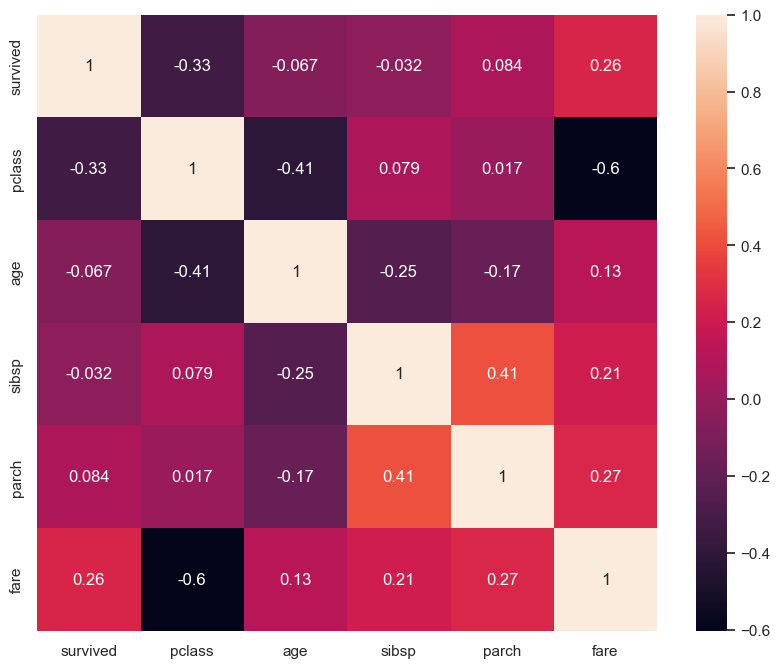

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True);

C:\Users\ahmad\AppData\Local\Temp\ipykernel_17796\1058057586.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='pclass', y='survived', hue= 'sex', data=df, ci=None);


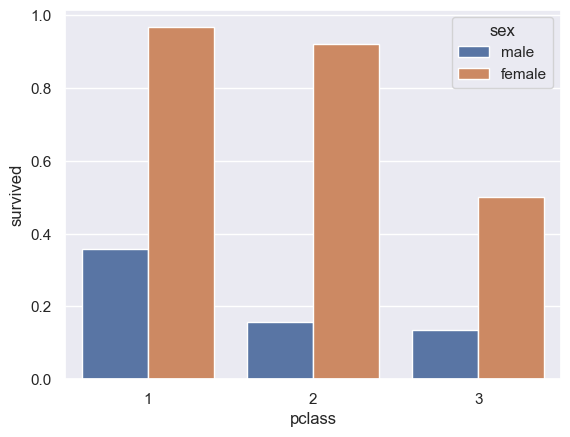

In [ ]:
sns.barplot(x='pclass', y='survived', hue= 'sex', data=df, ci=None);

C:\Users\ahmad\AppData\Local\Temp\ipykernel_17796\3729839610.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='embarked', y='survived', hue= 'sex', data=df, ci=None);


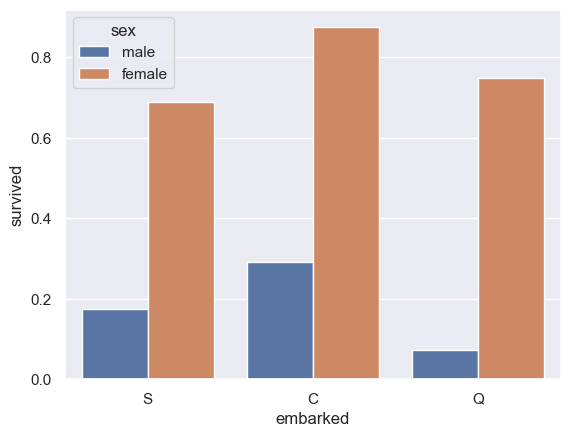

In [ ]:
sns.barplot(x='embarked', y='survived', hue= 'sex', data=df, ci=None);

# Conclusion

C:\Users\ahmad\AppData\Local\Temp\ipykernel_17796\1311005070.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y= 'survived', data=df, ci=None, ax=ax[i//4, i%4])
C:\Users\ahmad\AppData\Local\Temp\ipykernel_17796\1311005070.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y= 'survived', data=df, ci=None, ax=ax[i//4, i%4])
C:\Users\ahmad\AppData\Local\Temp\ipykernel_17796\1311005070.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y= 'survived', data=df, ci=None, ax=ax[i//4, i%4])
C:\Users\ahmad\AppData\Local\Temp\ipykernel_17796\1311005070.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y= 'survived', data=df, ci=None, ax=ax[i//4, i%4])
C:\Users\ahmad\AppData\Local\Temp\ipykernel_17796\1311005070.py:4: Futur

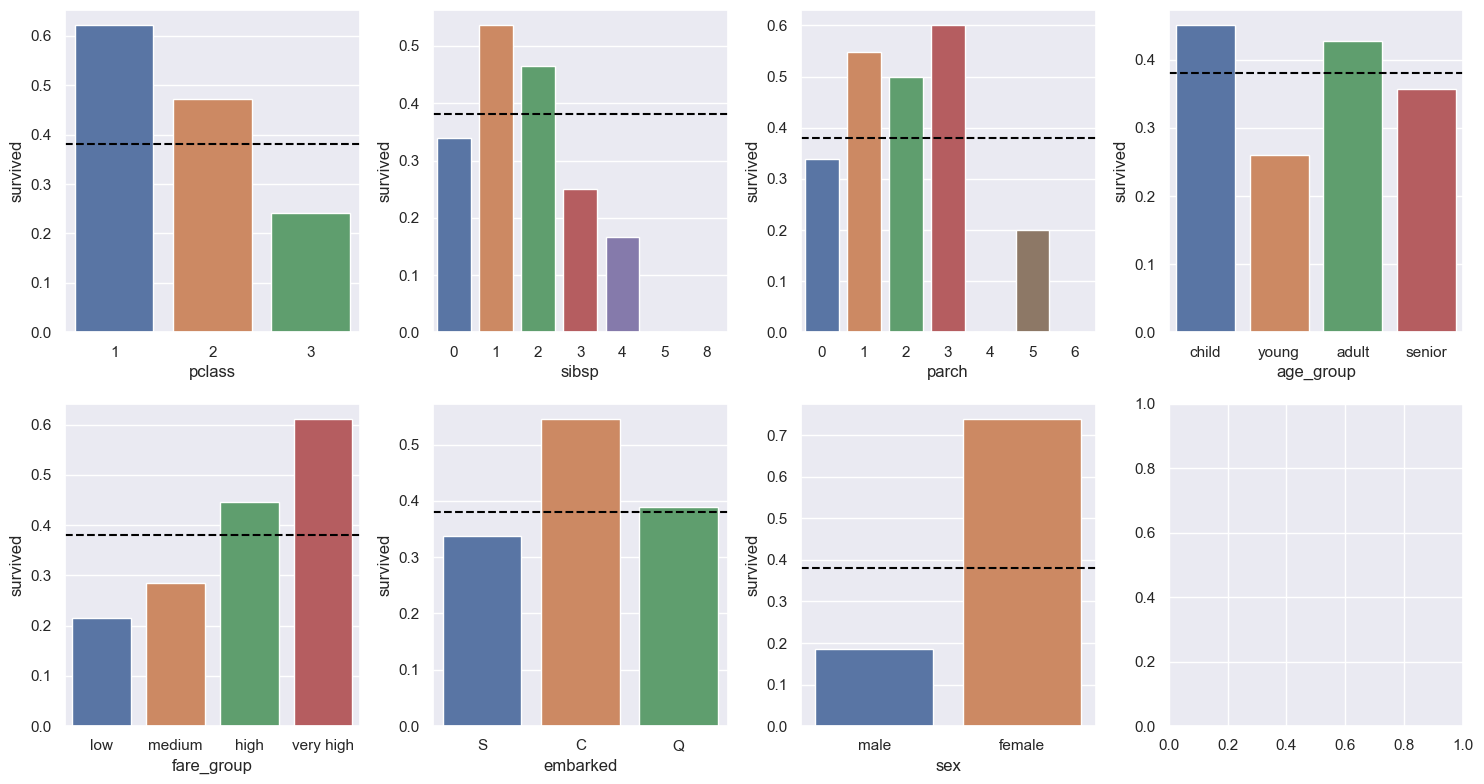

In [ ]:
# 7 Subplots
fig, ax = plt.subplots(2, 4, figsize=(15, 8))
for i, col in enumerate(['pclass', 'sibsp', 'parch', 'age_group', 'fare_group', 'embarked', 'sex']):
    sns.barplot(x=col, y= 'survived', data=df, ci=None, ax=ax[i//4, i%4])
    ax[i//4, i%4].axhline(df.survived.mean(), color='black', linestyle='--')

plt.tight_layout()
plt.show()



In [ ]:
female_df = df[df.sex == 'female']
male_df = df[df.sex == 'male']

In [ ]:
# female_df.to_csv('female_passengers.csv')

In [ ]:
female_df.survived.value_counts(normalize=True)

1    0.73955
0    0.26045
Name: survived, dtype: float64

In [ ]:
female_df.groupby('pclass').survived.mean()

pclass
1    0.967033
2    0.921053
3    0.500000
Name: survived, dtype: float64

In [ ]:
type(female_df.groupby('pclass').survived.mean())  # Pandas Series

pandas.core.series.Series

C:\Users\ahmad\AppData\Local\Temp\ipykernel_17796\3474947662.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='pclass', y='survived', data=female_df, ci=None);


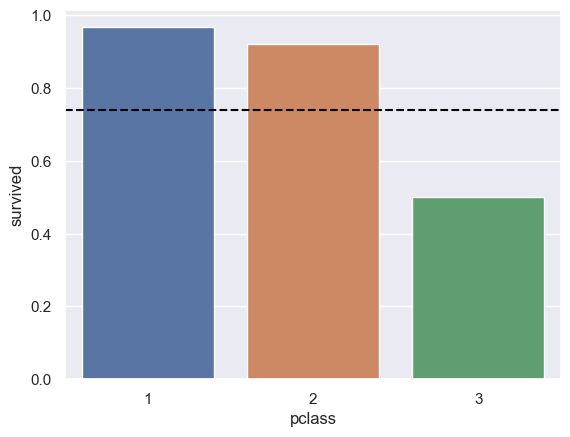

In [ ]:
sns.barplot(x='pclass', y='survived', data=female_df, ci=None);
plt.axhline(female_df.survived.mean(), color='black', linestyle='--')
plt.show()

In [ ]:
male_df.survived.value_counts(normalize=True)

0    0.813913
1    0.186087
Name: survived, dtype: float64

In [ ]:
male_df.groupby('pclass').survived.mean()

pclass
1    0.358333
2    0.157407
3    0.135447
Name: survived, dtype: float64

C:\Users\ahmad\AppData\Local\Temp\ipykernel_17796\2591017502.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='pclass', y='survived', data=male_df, ci=None);


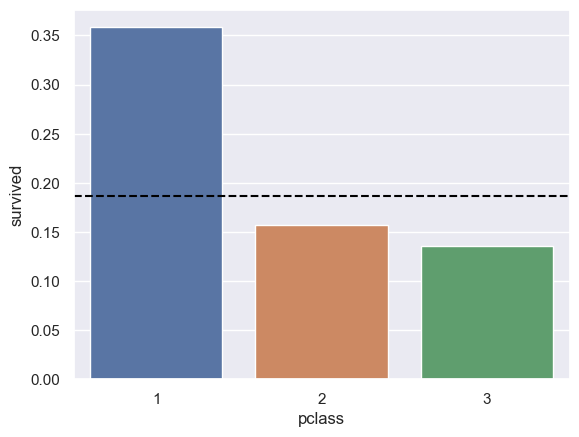

In [ ]:
sns.barplot(x='pclass', y='survived', data=male_df, ci=None);
plt.axhline(male_df.survived.mean(), color='black', linestyle='--')

In [ ]:
sex_class = pd.merge(female_df.groupby('pclass').survived.mean(), male_df.groupby('pclass').survived.mean(), on='pclass')
sex_class

,survived_x,survived_y
pclass,,
1,0.967033,0.358333
2,0.921053,0.157407
3,0.500000,0.135447


In [ ]:
sex_class.rename(columns= {'survived_x': 'female_survived', 'survived_y': 'male_survived'}, inplace=True)

In [ ]:
sex_class

,female_survived,male_survived
pclass,,
1,0.967033,0.358333
2,0.921053,0.157407
3,0.500000,0.135447


In [ ]:
df.groupby(['pclass', 'sex']).survived.mean()

pclass  sex   
1       female    0.967033
        male      0.358333
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: survived, dtype: float64

# Insights



* The higher the class, the higher the survival rate
* The higher the fare, the higher the survival rate
* Females had a higher survival rate